In [1]:
import numpy as np
import networkx as nx
import tweedledum
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.quantumregister import Qubit
from IPython.display import display

from typing import Dict, Any, List, Tuple

2.1.2
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|+\rangle, |-i\rangle, |1\rangle)$$ 
2.1.3
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |i\rangle, |+\rangle)$$ 
2.1.4
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |i\rangle, |+\rangle)$$
2.1.5
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |-\rangle, |i\rangle)$$

In [ ]:
from itertools import product
import numpy as np

max_length = 20

H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
S = np.array([[1, 0], [0, 1j]])

# Redefine the gates dictionary
gates = {'H': H, 'S': S}

ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])
ket_plus = 1/np.sqrt(2) * (ket_0 + ket_1)
ket_minus = 1/np.sqrt(2) * (ket_0 - ket_1)
ket_i = 1/np.sqrt(2) * (ket_0 + 1j*ket_1)
ket_iminus = 1/np.sqrt(2) * (ket_0 - 1j*ket_1)

# Update the initial and target states dictionaries
initial_states = {'+': ket_plus, 'i': ket_i, '0': ket_0}
target_states = {'+': ket_plus, 'i': ket_iminus, '0': ket_1}
target_states = {'+': ket_0, 'i': ket_i, '0': ket_plus}
target_states = {'+': ket_1, 'i': ket_i, '0': ket_plus}
target_states = {'+': ket_1, 'i': ket_minus, '0': ket_i}

def apply_gate_sequence(state, sequence, gates):
    for gate in sequence:
        state = gates[gate] @ state
    return state

# Run the brute-force search algorithm again with the corrected state definitions
found_sequence = None
for length in range(1, max_length + 1):
    for sequence in product('HS', repeat=length):
        transformation_success = True
        for state_label, initial_state in initial_states.items():
            transformed_state = apply_gate_sequence(initial_state, sequence, gates)
            if sequence == ('H', 'S', 'H'):
                print(initial_state, sequence, gates)
                print(transformed_state, target_states[state_label])
            if not np.allclose(transformed_state, target_states[state_label]):
                transformation_success = False
                break
        if transformation_success:
            found_sequence = sequence
            break
    if found_sequence:
        break

print(found_sequence)


Cuccaro Adder with 8-CNOT Toffoli:


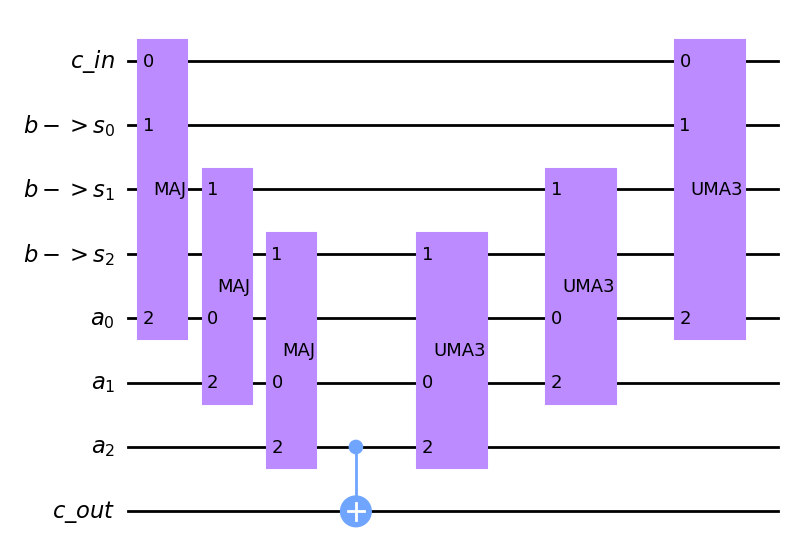

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

# 8-CNOT Toffoli Decomposition
def toffoli_8_cnot():
    qc = QuantumCircuit(3)
    qc.h(2)
    qc.t(0)
    qc.t(1)
    qc.t(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.t(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.tdg(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.tdg(1)
    qc.tdg(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.h(2)
    return qc.to_gate(label="Toffoli 8-CNOT")

# Majority gate with 8-CNOT Toffoli
def maj_gate_8_cnot():
    maj_c = QuantumCircuit(3, name='MAJ')
    maj_c.cx(2, 1)
    maj_c.cx(2, 0)
    maj_c.append(toffoli_8_cnot(), [0, 1, 2])
    return maj_c.to_gate(label='MAJ')

# UMA3 gate with 8-CNOT Toffoli
def uma3_gate_8_cnot():
    uma3_c = QuantumCircuit(3, name='UMA3')
    uma3_c.x(1)
    uma3_c.cx(0, 1)
    uma3_c.append(toffoli_8_cnot(), [0, 1, 2])
    uma3_c.x(1)
    uma3_c.cx(2, 0)
    uma3_c.cx(2, 1)
    return uma3_c.to_gate(label='UMA3')

# Cuccaro Adder using the 8-CNOT Toffoli decomposition
def cuccaro_adder_8_cnot(n):
    if n % 2 != 0:
        raise ValueError('Odd number of qubits')

    cin = QuantumRegister(1, 'c_in')
    a = QuantumRegister(n//2-1, 'a')
    b = QuantumRegister(n//2-1, 'b->s')
    cout = QuantumRegister(1, 'c_out')
    c = QuantumCircuit(cin, b, a, cout)

    maj = maj_gate_8_cnot()
    uma3 = uma3_gate_8_cnot()

    c.append(maj, [cin, b[0], a[0]])
    for i in range(1, len(b)):
        c.append(maj, [a[i-1], b[i], a[i]])

    c.cx(a[-1], cout)

    for i in reversed(range(1, len(b))):
        c.append(uma3, [a[i-1], b[i], a[i]])
    c.append(uma3, [cin, b[0], a[0]])

    return c

# Generate the Cuccaro Adder with 8-CNOT Toffoli
cuccaro8_8_cnot = cuccaro_adder_8_cnot(8)
print('Cuccaro Adder with 8-CNOT Toffoli:')
cuccaro8_8_cnot.draw('mpl', fold=-1)


Controlled Cuccaro Adder with 8-CNOT Toffoli:


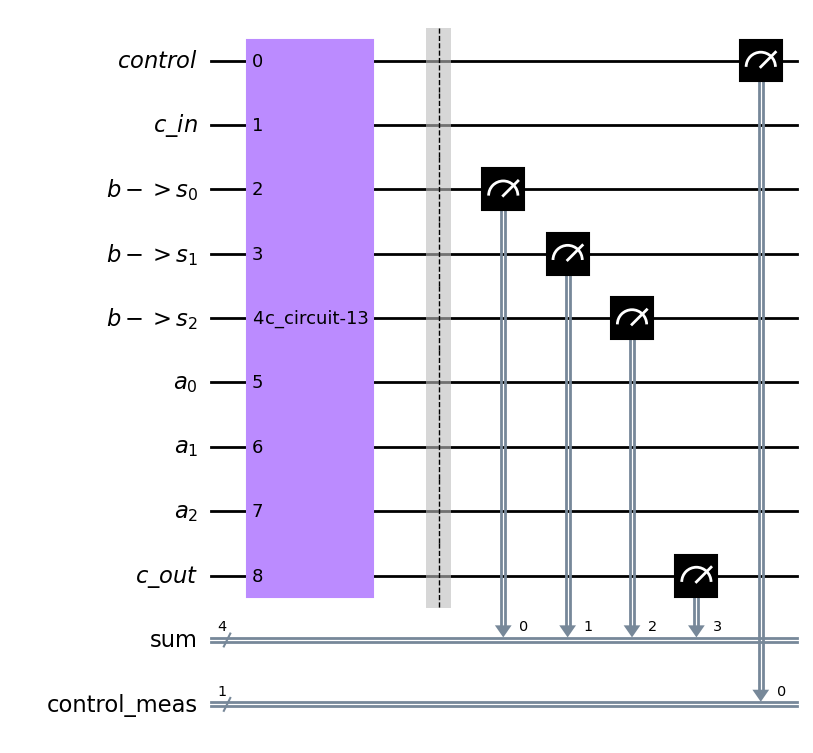

In [2]:
def generate_controlled_cuccaro_adder(n):
    control = QuantumRegister(1, 'control')
    cin = QuantumRegister(1, 'c_in')
    a = QuantumRegister(n//2-1, 'a')
    b = QuantumRegister(n//2-1, 'b->s')
    cout = QuantumRegister(1, 'c_out')
    creg = ClassicalRegister(n//2, 'sum')
    creg2 = ClassicalRegister(1, 'control_meas')

    cuccaro_circuit = cuccaro_adder_8_cnot(n)
    controlled_cuccaro = cuccaro_circuit.control()

    controlled_demo = QuantumCircuit(control, cin, b, a, cout, creg, creg2)
    controlled_demo.append(controlled_cuccaro, [control[0], *cin, *b, *a, *cout])

    # Optional: Add measurement if needed
    controlled_demo.barrier()
    controlled_demo.measure([*b, *cout], creg)
    controlled_demo.measure(control, creg2)

    return controlled_demo

# Generate the controlled Cuccaro adder circuit
n = 8  # Number of qubits
controlled_cuccaro8 = generate_controlled_cuccaro_adder(n)
print("Controlled Cuccaro Adder with 8-CNOT Toffoli:")
controlled_cuccaro8.draw('mpl', fold=-1)

In [5]:
# Assuming you already have the controlled Cuccaro adder circuit created and named 'controlled_cuccaro_adder'
cnot_count = sum(1 for gate in controlled_cuccaro8.data if gate[0].name == 'cx')
print(f"Number of CNOT gates: {cnot_count}")


Number of CNOT gates: 0


In [7]:
from qiskit import transpile

transpiled_controlled_cuccaro8 = transpile(controlled_cuccaro8, basis_gates=['cx', 'u3'])

# Count the number of CNOT gates in the transpiled circuit
cnot_count = sum(1 for gate in transpiled_controlled_cuccaro8.data if gate[0].name == 'cx')
print(f"Number of CNOT gates in the controlled Cuccaro adder: {cnot_count}")

# Optional: Display the transpiled circuit
print(controlled_cuccaro8.draw(output='text', fold=-1))


Number of CNOT gates in the controlled Cuccaro adder: 486
                ┌───────────────┐ ░             ┌─┐
       control: ┤0              ├─░─────────────┤M├
                │               │ ░             └╥┘
          c_in: ┤1              ├─░──────────────╫─
                │               │ ░ ┌─┐          ║ 
        b->s_0: ┤2              ├─░─┤M├──────────╫─
                │               │ ░ └╥┘┌─┐       ║ 
        b->s_1: ┤3              ├─░──╫─┤M├───────╫─
                │               │ ░  ║ └╥┘┌─┐    ║ 
        b->s_2: ┤4 c_circuit-13 ├─░──╫──╫─┤M├────╫─
                │               │ ░  ║  ║ └╥┘    ║ 
           a_0: ┤5              ├─░──╫──╫──╫─────╫─
                │               │ ░  ║  ║  ║     ║ 
           a_1: ┤6              ├─░──╫──╫──╫─────╫─
                │               │ ░  ║  ║  ║     ║ 
           a_2: ┤7              ├─░──╫──╫──╫─────╫─
                │               │ ░  ║  ║  ║ ┌─┐ ║ 
         c_out: ┤8              ├─░──╫──╫──╫─┤M├─╫─
      

In [16]:
# Implementation of the Cuccaro Quantum Adder from
#   https://github.com/jmbaker94/quantumcircuitbenchmarks
# Design from the paper
#   https://arxiv.org/abs/quant-ph/0410184

# Majority gate
maj_c = QuantumCircuit(3, name='MAJ')
maj_c.cx(2, 1)
maj_c.cx(2, 0)
maj_c.ccx(0, 1, 2)
maj = maj_c.to_gate(label='MAJ')
print('MAJ:')
display(maj_c.draw(fold=-1))

# 2-CNOT version of UnMajority and Add gate
uma2_c = QuantumCircuit(3, name='UMA2')
uma2_c.toffoli(0, 1, 2)
uma2_c.cx(2, 0)
uma2_c.cx(0, 1)
uma2 = uma2_c.to_gate(label='UMA2')
print('UMA2:')
display(uma2_c.draw(fold=-1))

# 3-CNOT version of UnMajority and Add gate
# (Allows more parallelism in the circuit)
uma3_c = QuantumCircuit(3, name='UMA3')
uma3_c.x(1)
uma3_c.cx(0, 1)
uma3_c.toffoli(0, 1, 2)
uma3_c.x(1)
uma3_c.cx(2, 0)
uma3_c.cx(2, 1)
uma3 = uma3_c.to_gate(label='UMA3')
print('UMA3:')
display(uma3_c.draw(fold=-1))

def cuccaro_adder(c, cin, a, b, cout, uma=uma3):
    c.append(maj, [cin, b[0], a[0]])
    for i in range(1, len(b)):
        c.append(maj, [a[i-1], b[i], a[i]])

    c.cx(a[-1], cout)

    for i in reversed(range(1, len(b))):
        c.append(uma, [a[i-1], b[i], a[i]])
    c.append(uma, [cin, b[0], a[0]])

def generate_adder_circuit(n, uma=uma3):
    if n % 2 != 0:
        raise ValueError('Odd number of qubits')

    cin = QuantumRegister(1, 'c_in')
    a = QuantumRegister(n//2-1, 'a')
    b = QuantumRegister(n//2-1, 'b->s')
    cout = QuantumRegister(1, 'c_out')
    c = QuantumCircuit(cin, b, a, cout)
        
    cuccaro_adder(c, cin, a, b, cout, uma=uma)
    return c

print('Cuccaro Adder:')
cuccaro8 = generate_adder_circuit(8)
cuccaro8.draw(fold=-1)

MAJ:


┌───┐     
q_0: ─────┤ X ├──■──
     ┌───┐└─┬─┘  │  
q_1: ┤ X ├──┼────■──
     └─┬─┘  │  ┌─┴─┐
q_2: ──■────■──┤ X ├
               └───┘

UMA2:


┌───┐     
q_0: ──■──┤ X ├──■──
       │  └─┬─┘┌─┴─┐
q_1: ──■────┼──┤ X ├
     ┌─┴─┐  │  └───┘
q_2: ┤ X ├──■───────
     └───┘

UMA3:


┌───┐     
q_0: ───────■────■───────┤ X ├─────
     ┌───┐┌─┴─┐  │  ┌───┐└─┬─┘┌───┐
q_1: ┤ X ├┤ X ├──■──┤ X ├──┼──┤ X ├
     └───┘└───┘┌─┴─┐└───┘  │  └─┬─┘
q_2: ──────────┤ X ├───────■────■──
               └───┘

Cuccaro Adder:


┌──────┐                                       ┌───────┐
  c_in: ┤0     ├───────────────────────────────────────┤0      ├
        │      │                                       │       │
b->s_0: ┤1     ├───────────────────────────────────────┤1      ├
        │      │┌──────┐                      ┌───────┐│       │
b->s_1: ┤  MAJ ├┤1     ├──────────────────────┤1      ├┤  UMA3 ├
        │      ││      │┌──────┐     ┌───────┐│       ││       │
b->s_2: ┤      ├┤      ├┤1     ├─────┤1      ├┤       ├┤       ├
        │      ││  MAJ ││      │     │       ││  UMA3 ││       │
   a_0: ┤2     ├┤0     ├┤      ├─────┤       ├┤0      ├┤2      ├
        └──────┘│      ││  MAJ │     │  UMA3 ││       │└───────┘
   a_1: ────────┤2     ├┤0     ├─────┤0      ├┤2      ├─────────
                └──────┘│      │     │       │└───────┘         
   a_2: ────────────────┤2     ├──■──┤2      ├──────────────────
                        └──────┘┌─┴─┐└───────┘                  
 c_out: ────────────────────────┤ X ├───────────────────────────
                                └───┘

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')

# Try it out!
n = 8
control = QuantumRegister(1, 'cont')
cin = QuantumRegister(1, 'c_in')
a = QuantumRegister(n//2-1, 'a')
b = QuantumRegister(n//2-1, 'b->s')
cout = QuantumRegister(1, 'c_out')
creg = ClassicalRegister(n//2, 'sum')
creg2 = ClassicalRegister(1, 'cont_meas')
controlled_demo = QuantumCircuit(control, cin, b, a, cout, creg, creg2)

# Test on a specific input
# carry-in=0 CHANGE ME!
###controlled_demo.x(cin[0])

# a=2 (0b010) CHANGE ME!
###controlled_demo.x(a[0])
controlled_demo.x(a[1])
###controlled_demo.x(a[2])

# b=3 (0b011) CHANGE ME!
controlled_demo.x(b[0])
controlled_demo.x(b[1])
###controlled_demo.x(b[2])

controlled_demo.h(control)

cuccaro8 = generate_adder_circuit(8)

controlled_demo.append(cuccaro8.to_gate(label='CUCC').control(1), [control[0], *cin, *b, *a, *cout])

# Measure the result
controlled_demo.barrier()
controlled_demo.measure([*b, *cout], creg)
controlled_demo.measure(control, creg2)

# Show the circuit
display(controlled_demo.draw(fold=-1))

# Simulate the result
# 0 + 2 + 3 = 5 (0b0101) if control=1
# 3 = 3 (0b0011) if control = 0
execute(controlled_demo, backend, shots=128).result().get_counts(controlled_demo)

┌───┐          ░             ┌─┐
       cont: ┤ H ├────■─────░─────────────┤M├
             └───┘┌───┴───┐ ░             └╥┘
       c_in: ─────┤0      ├─░──────────────╫─
             ┌───┐│       │ ░ ┌─┐          ║ 
     b->s_0: ┤ X ├┤1      ├─░─┤M├──────────╫─
             ├───┤│       │ ░ └╥┘┌─┐       ║ 
     b->s_1: ┤ X ├┤2      ├─░──╫─┤M├───────╫─
             └───┘│       │ ░  ║ └╥┘┌─┐    ║ 
     b->s_2: ─────┤3      ├─░──╫──╫─┤M├────╫─
                  │  CUCC │ ░  ║  ║ └╥┘    ║ 
        a_0: ─────┤4      ├─░──╫──╫──╫─────╫─
             ┌───┐│       │ ░  ║  ║  ║     ║ 
        a_1: ┤ X ├┤5      ├─░──╫──╫──╫─────╫─
             └───┘│       │ ░  ║  ║  ║     ║ 
        a_2: ─────┤6      ├─░──╫──╫──╫─────╫─
                  │       │ ░  ║  ║  ║ ┌─┐ ║ 
      c_out: ─────┤7      ├─░──╫──╫──╫─┤M├─╫─
                  └───────┘ ░  ║  ║  ║ └╥┘ ║ 
      sum: 4/══════════════════╩══╩══╩══╩══╬═
                               0  1  2  3  ║ 
                                           ║ 
cont_meas: 1/══════════════════════════════╩═
                                           0

{'0 0011': 68, '1 0101': 60}

In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library.standard_gates import CXGate
from qiskit.circuit import Gate


# Creating a Quantum Circuit from the qasm string
cuccaro_circuit = controlled_demo

# Define the 8-CNOT Toffoli gate
def toffoli_8_cnot():
    qc = QuantumCircuit(3)
    qc.h(2)
    qc.t(0)
    qc.t(1)
    qc.t(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.t(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.tdg(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.tdg(1)
    qc.tdg(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.h(2)
    return qc.to_gate(label="Toffoli 8-CNOT")

# Replace all Toffoli gates with the 8-CNOT Toffoli gate in the circuit
toffoli_8_cnot_gate = toffoli_8_cnot()
for i in range(len(cuccaro_circuit.data)):
    if isinstance(cuccaro_circuit.data[i][0], Gate) and cuccaro_circuit.data[i][0].name == 'ccx':
        cuccaro_circuit.data[i] = (toffoli_8_cnot_gate, cuccaro_circuit.data[i][1], cuccaro_circuit.data[i][2])

# Transpile the circuit to decompose into the basis gates ['cx', 'u1', 'u2', 'u3']
decomposed_circuit = transpile(cuccaro_circuit, basis_gates=['cx', 'u1', 'u2', 'u3'])

# Count the number of CNOT gates
cnot_count = sum(1 for gate, _, _ in decomposed_circuit.data if isinstance(gate, CXGate))

print("Number of CNOT gates:", cnot_count)


Number of CNOT gates: 426


In [22]:
from qiskit import QuantumCircuit, transpile

def toffoli_8_cnot(qc, ctrl1, ctrl2, target):
    # Decomposition of Toffoli gate into 8 CNOTs
    qc.h(target)
    qc.t(ctrl1)
    qc.t(ctrl2)
    qc.t(target)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.tdg(target)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.t(target)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.tdg(ctrl2)
    qc.tdg(target)
    qc.cx(ctrl1, ctrl2)
    qc.h(target)

def maj_gate(qc, a, b, c):
    # Use the decomposed Toffoli gate
    toffoli_8_cnot(qc, b, c, a)
    qc.cx(c, b)
    qc.cx(c, a)

def uma_gate(qc, a, b, c):
    qc.cx(c, a)
    qc.cx(a, b)
    # Use the decomposed Toffoli gate
    toffoli_8_cnot(qc, b, c, a)

def controlled_cuccaro_adder(a, b, c_in, c_out, control):
    n = len(a)
    qc = QuantumCircuit(control, a, b, c_in, c_out, name="Controlled Cuccaro Adder")

    # Controlled MAJ gates
    for i in range(n):
        maj_gate(qc, c_in[0] if i == 0 else a[i-1], b[i], a[i])
        qc.cx(control, b[i])

    # Final controlled-CNOT (decomposed as well)
    toffoli_8_cnot(qc, control, a[n-1], c_out[0])

    # Controlled UMA gates
    for i in reversed(range(n)):
        uma_gate(qc, c_in[0] if i == 0 else a[i-1], b[i], a[i])
        qc.cx(control, b[i])

    return qc

# Define quantum registers
a = QuantumRegister(3, name='a')
b = QuantumRegister(3, name='b')
c_in = QuantumRegister(1, name='c_in')
c_out = QuantumRegister(1, name='c_out')
control = QuantumRegister(1, name='control')

# Create the controlled adder circuit
adder_circuit = controlled_cuccaro_adder(a, b, c_in, c_out, control)

# Decompose and count CNOTs
decomposed_circuit = transpile(adder_circuit, basis_gates=['cx', 'u3'])
cnot_count = decomposed_circuit.count_ops().get('cx', 0)

print("Number of CNOT gates:", cnot_count)


Number of CNOT gates: 67


In [25]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

def decomposed_ch_gate(qc, ctrl, target):
    qc.ry(np.pi/2, target)
    qc.cx(ctrl, target)
    qc.ry(-np.pi/2, target)

def decomposed_ct_gate(qc, ctrl, target):
    qc.u1(np.pi/4, target)
    qc.cx(ctrl, target)
    qc.u1(-np.pi/4, target)
    qc.cx(ctrl, target)

def decomposed_ctdg_gate(qc, ctrl, target):
    qc.u1(-np.pi/4, target)
    qc.cx(ctrl, target)
    qc.u1(np.pi/4, target)
    qc.cx(ctrl, target)

def toffoli_8_cnot(qc, ctrl1, ctrl2, target):
    qc.h(target)
    qc.t(ctrl1)
    qc.t(ctrl2)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.tdg(target)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.t(target)
    qc.cx(ctrl1, ctrl2)
    qc.cx(ctrl2, target)
    qc.tdg(ctrl2)
    qc.tdg(target)
    qc.cx(ctrl1, ctrl2)
    qc.h(target)

def controlled_toffoli_8_cnot(qc, extra_ctrl, ctrl1, ctrl2, target):
    decomposed_ch_gate(qc, extra_ctrl, target)
    decomposed_ct_gate(qc, extra_ctrl, ctrl1)
    decomposed_ct_gate(qc, extra_ctrl, ctrl2)
    toffoli_8_cnot(qc, extra_ctrl, ctrl1, ctrl2)
    decomposed_ctdg_gate(qc, extra_ctrl, target)
    toffoli_8_cnot(qc, extra_ctrl, ctrl1, ctrl2)
    decomposed_ct_gate(qc, extra_ctrl, target)
    toffoli_8_cnot(qc, extra_ctrl, ctrl1, ctrl2)
    decomposed_ctdg_gate(qc, extra_ctrl, ctrl2)
    decomposed_ctdg_gate(qc, extra_ctrl, target)
    toffoli_8_cnot(qc, extra_ctrl, ctrl1, ctrl2)
    decomposed_ch_gate(qc, extra_ctrl, target)

# Example usage
qr = QuantumRegister(5)
qc = QuantumCircuit(qr)
controlled_toffoli_8_cnot(qc, qr[0], qr[1], qr[2], qr[3])

# Print the circuit
print(qc)


                                                                           »
q122_0: ─────────────■───────■────────────────────■────■────────────────■──»
        ┌─────────┐  │     ┌─┴─┐    ┌──────────┐┌─┴─┐  │     ┌───┐      │  »
q122_1: ┤ U1(π/4) ├──┼─────┤ X ├────┤ U1(-π/4) ├┤ X ├──┼─────┤ T ├──────┼──»
        ├─────────┤  │     └───┘    └──────────┘└───┘┌─┴─┐┌──┴───┴───┐┌─┴─┐»
q122_2: ┤ U1(π/4) ├──┼───────────────────────────────┤ X ├┤ U1(-π/4) ├┤ X ├»
        ├─────────┤┌─┴─┐┌──────────┐┌──────────┐     └───┘└──────────┘└───┘»
q122_3: ┤ Ry(π/2) ├┤ X ├┤ Ry(-π/2) ├┤ U1(-π/4) ├───────────────────────────»
        └─────────┘└───┘└──────────┘└──────────┘                           »
q122_4: ───────────────────────────────────────────────────────────────────»
                                                                           »
«        ┌───┐                                                                 »
«q122_0: ┤ T ├──■──────────■──────────■────────────────■────■───────────

/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_254/844026139.py:10: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(np.pi/4, target)
/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_254/844026139.py:12: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(-np.pi/4, target)
/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_254/844026139.py:16: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(-np.pi/4, target)
/var/folders/6b/d33y

In [26]:
from qiskit import QuantumCircuit, QuantumRegister

# Define the Majority gate with an additional control qubit
def maj_with_control(circuit, control, a, b, c):
    circuit.ccx(control, b, c)
    circuit.cx(control, b)
    circuit.ccx(a, b, c)

# Define the UMA gate with an additional control qubit
def uma_with_control(circuit, control, a, b, c):
    circuit.ccx(a, b, c)
    circuit.cx(control, b)
    circuit.ccx(control, a, b)

# Function to create the Cuccaro adder with an additional control qubit
def cuccaro_adder_with_control(n, control_qubit, uma_gate):
    cin = QuantumRegister(1, 'c_in')
    a = QuantumRegister(n//2-1, 'a')
    b = QuantumRegister(n//2-1, 'b->s')
    cout = QuantumRegister(1, 'c_out')
    control = QuantumRegister(1, 'control')
    circuit = QuantumCircuit(cin, b, a, cout, control)

    # Adder logic with control
    maj_with_control(circuit, control_qubit, cin, b[0], a[0])
    for i in range(1, len(b)):
        maj_with_control(circuit, control_qubit, a[i-1], b[i], a[i])

    circuit.ccx(control_qubit, a[-1], cout)

    for i in reversed(range(1, len(b))):
        uma_gate(circuit, control_qubit, a[i-1], b[i], a[i])
    uma_gate(circuit, control_qubit, cin, b[0], a[0])

    return circuit

# Example circuit with 8 qubits and a control qubit
n = 8
control_qubit = QuantumRegister(1, 'control')
cuccaro_circuit = cuccaro_adder_with_control(n, control_qubit, uma_with_control)

# Display the circuit
cuccaro_circuit.draw(fold=-1)


c_in: ────────────■─────────────────────────────────────────────────────────────────────■─────────■──
              ┌───┐  │                                                                     │  ┌───┐┌─┴─┐
 b->s_0: ──■──┤ X ├──■─────────────────────────────────────────────────────────────────────■──┤ X ├┤ X ├
           │  └─┬─┘  │       ┌───┐                                             ┌───┐┌───┐  │  └─┬─┘└─┬─┘
 b->s_1: ──┼────┼────┼────■──┤ X ├──■───────────────────────────────────────■──┤ X ├┤ X ├──┼────┼────┼──
           │    │    │    │  └─┬─┘  │       ┌───┐               ┌───┐┌───┐  │  └─┬─┘└─┬─┘  │    │    │  
 b->s_2: ──┼────┼────┼────┼────┼────┼────■──┤ X ├──■─────────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
         ┌─┴─┐  │  ┌─┴─┐  │    │    │    │  └─┬─┘  │         │  └─┬─┘└─┬─┘  │    │    │  ┌─┴─┐  │    │  
    a_0: ┤ X ├──┼──┤ X ├──┼────┼────■────┼────┼────┼─────────┼────┼────┼────■────┼────■──┤ X ├──┼────┼──
         └─┬─┘  │  └───┘┌─┴─┐  │  ┌─┴─┐  │    │    │         │    │    │  ┌─┴─┐  │    │  └───┘  │    │  
    a_1: ──┼────┼───────┤ X ├──┼──┤ X ├──┼────┼────■─────────■────┼────■──┤ X ├──┼────┼─────────┼────┼──
           │    │       └─┬─┘  │  └───┘┌─┴─┐  │  ┌─┴─┐     ┌─┴─┐  │    │  └───┘  │    │         │    │  
    a_2: ──┼────┼─────────┼────┼───────┤ X ├──┼──┤ X ├──■──┤ X ├──┼────┼─────────┼────┼─────────┼────┼──
           │    │         │    │       └─┬─┘  │  └───┘┌─┴─┐└───┘  │    │         │    │         │    │  
  c_out: ──┼────┼─────────┼────┼─────────┼────┼───────┤ X ├───────┼────┼─────────┼────┼─────────┼────┼──
           │    │         │    │         │    │       └─┬─┘       │    │         │    │         │    │  
control: ──■────■─────────■────■─────────■────■─────────■─────────■────■─────────■────■─────────■────■──

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Initialize circuit with two qubits
qc4_prep = QuantumCircuit(2)

# The observable X⊕X
o1_circ = QuantumCircuit(2)
o1_circ.x(0)
o1_circ.x(1)

# The observable Z⊕Z
o2_circ = QuantumCircuit(2)
o2_circ.z(0)
o2_circ.z(1)

# Main quantum circuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc4 = QuantumCircuit(q, c)

# Prepare the initial state (qubits 1 and 2)
qc4.append(qc4_prep.to_gate(label='prep'), [1, 2])
qc4.barrier()

# Measure observable 1
qc4.h(0)
qc4.append(o1_circ.to_gate(label='O1').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

# Conditional operations after first measurement
qc4.x(0, label='reset').c_if(c, 1) 
qc4.z(2).c_if(c, 1)
qc4.barrier()

# Measure observable 2
qc4.h(0)
qc4.append(o2_circ.to_gate(label='O2').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

qc4_no_measurements = qc4.remove_final_measurements(inplace=False)

# Execute the circuit
backend = Aer.get_backend('statevector_simulator')
result = execute(qc4_no_measurements, backend).result()
statevector = result.get_statevector()

# Extract the statevector for qubits 1 and 2
psi_1 = statevector.reshape((2, 2, 2))[:, 0, 0]

print("State vector (psi_1) for qubits 1 and 2:", psi_1)
psi_1

State vector (psi_1) for qubits 1 and 2: [7.07106781e-01-1.29893408e-16j 2.29934717e-17+8.65956056e-17j]


/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_51524/2493477703.py:52: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  psi_1 = statevector.reshape((2, 2, 2))[:, 0, 0]


array([7.07106781e-01-1.29893408e-16j, 2.29934717e-17+8.65956056e-17j])